In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation, Conv1D,MaxPooling1D,Flatten,GlobalAveragePooling1D,GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.initializers import glorot_uniform
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from keras.layers import Flatten
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error

In [9]:
Train = pd.read_csv("Data/Train.csv")

In [10]:
display(Train)
subTrain=Train[0:100]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
subTrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
subTrain.shape

(100, 785)

In [13]:
Y_train = subTrain["label"]
X_train = subTrain.drop(labels = ["label"],axis = 1) 

#Sub Train
Y_train = Train["label"]
X_train = Train.drop(labels = ["label"],axis = 1) 
#End of sub train

Y_Train_Stat = Y_train.value_counts().rename_axis('label').reset_index(name='counts')
print(Y_Train_Stat)

   label  counts
0      1    4684
1      7    4401
2      3    4351
3      9    4188
4      2    4177
5      6    4137
6      0    4132
7      4    4072
8      8    4063
9      5    3795


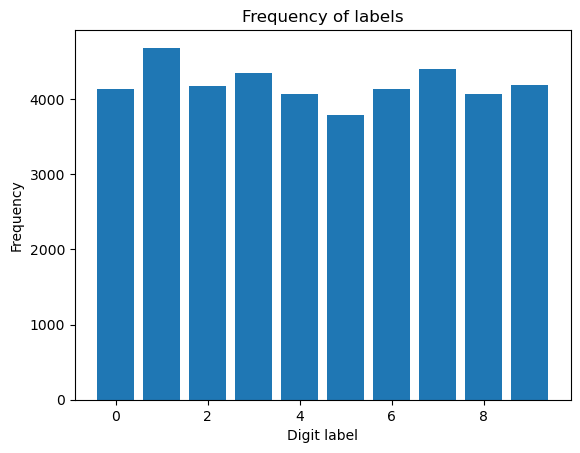

In [14]:
plt.bar(Y_Train_Stat['label'], Y_Train_Stat['counts'])
plt.title('Frequency of labels')
plt.xlabel('Digit label')
plt.ylabel('Frequency')
plt.show()

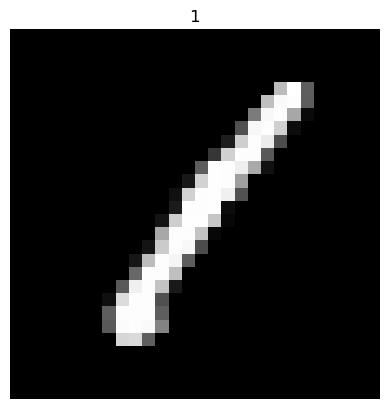

In [15]:
# Sample image
img = X_train.iloc[0].values
Size_img =math.sqrt(X_train.shape[1])
img = img.reshape((int(Size_img),int(Size_img)))
plt.imshow(img,cmap='gray')
plt.title(Train.iloc[0,0])
plt.axis("off")
plt.show()

In [16]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#without scaler
filtered_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
EpochNum=5
filtersize=10

y_Train_pre_HOT=Y_train
#y_Train= tf.one_hot(np.reshape(y_Train_pre_HOT,x_Train.shape[0]),y_Train_pre_HOT[ySelectedFeatures[0]].nunique())


In [ ]:
#without scaler
filtersize=5

model_cnn_wide = Sequential()
model_cnn_wide.add(Conv1D(filters=filtersize, kernel_size=filtered_train.shape[1]-1, input_shape=(filtered_train.shape[1], filtered_train.shape[2])))
model_cnn_wide.add(MaxPooling1D(pool_size=1 ))
model_cnn_wide.add(Flatten())
model_cnn_wide.add(Dense(1000, activation='relu'))
model_cnn_wide.add(Dense(10, activation='softmax'))
model_cnn_wide.compile(loss='CategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_wide.summary()
history_cnn_wide_non_standardize=model_cnn_wide.fit(x=filtered_train, y=y_Train, epochs=EpochNum)
yhat_cnn_wide_non_standardize = model_cnn_wide.predict(filtered_train)

print("Non standardize model, the best accuracy={}".format(history_cnn_wide_non_standardize.history['accuracy'][-1]))

NameError: name 'ySelectedFeatures' is not defined

NameError: name 'train' is not defined

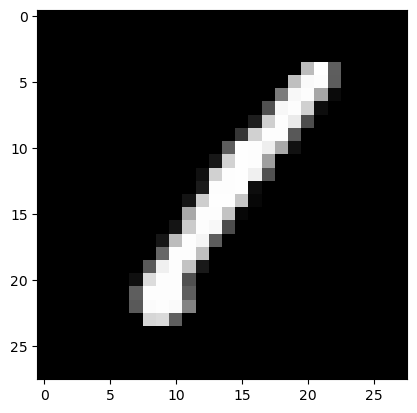

In [34]:
# plot some samples
img = X_train.iloc[0].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()


In [33]:
img

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
plt